<a href="https://colab.research.google.com/github/HridayPatney/Neural-Network-From-Scratch/blob/main/NNFromScratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [80]:
import numpy as np
import pandas as pd
df=pd.read_csv('train.csv')
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [81]:
df=np.array(df)

In [82]:
m,n=df.shape
np.random.shuffle(df)  # avoid biases by random shuffling data , before splitting into dev(fine tune hyperparameters) and training set

In [83]:
m

42000

In [84]:
n

785

In [85]:
df_dev=df[0:1000].T

In [86]:
Y_dev=df_dev[0] # label is at 1st col
X_dev=df_dev[1:n]
X_dev=X_dev/255


In [87]:
df_train=df[1000:m].T
Y_train=df_train[0] # label assigned to Y
X_train=df_train[1:n]
X_train=X_train/255
_,m_train = X_train.shape

In [88]:
Y_train

array([8, 0, 4, ..., 3, 7, 1])

In [89]:
def start():
  W1=np.random.rand(10,784)-0.5   #randomly initialize weights and biases , according to dimensions , input layer of 784 neurons
  b1=np.random.rand(10,1)-0.5
  W2=np.random.rand(10,10)-0.5   #  layer of 10 neurons on which we will use relu
  b2=np.random.rand(10,1)-0.5
  return W1,b1,W2,b2

In [90]:
def softmax(Z):
  A=np.exp(Z)/sum(np.exp(Z))  # implement softmax function
  return A

In [71]:
def predict(A2):
  return np.argmax(A2,0)              # one with max probability as given by softmax is chosen as output
def accuracy(Y_hat,Y):
  return np.sum(Y_hat==Y)/Y.size    # what percentage of output were classified correctly

In [72]:
def ForwardPass(W1,b1,W2,b2,X):
  Z1=W1.dot(X)+b1
  A1=np.maximum(Z1,0) # relu func is max(A,0)
  Z2=W2.dot(A1)+b2
  A2=softmax(Z2)
  return Z1,A1,Z2,A2


In [73]:
def encode(Y):
    one_hot_Y = np.zeros((Y.size, int(Y.max() + 1)))
    one_hot_Y[np.arange(Y.size), Y.astype(int)] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

In [74]:
def derivativeAct(Z):    # derivative of relu function
  return Z > 0

In [75]:
def backwardPass(Z1,A1,Z2,A2,W1,W2,X,Y):
  one_hotY=encode(Y)
  dZ2=A2-one_hotY
  dW2=1/m * dZ2.dot(A1.T)
  db2=1/m * np.sum(dZ2)

  dZ1=W2.T.dot(dZ2)* derivativeAct(Z1)
  dW1=1/m* dZ1.dot(X.T)
  db1=1/m* np.sum(dZ1)
  return dW1,db1,dW2,db2



In [76]:
def update_params(W1,b1,W2,b2,dW1,db1,dW2,db2,LR):
  W1=W1-LR*dW1
  b1=b1-LR*db1
  W2=W2-LR*dW2
  b2=b2-LR*db2
  return W1,b1,W2,b2

In [77]:
def gradient_descent(X,Y,iterations,LR):
  W1,b1,W2,b2=start()
  for i in range(iterations):
    Z1,A1,Z2,A2=ForwardPass(W1,b1,W2,b2,X)
    dW1,db1,dW2,db2=backwardPass(Z1,A1,Z2,A2,W1,W2,X,Y)
    W1,b1,W2,b2=update_params(W1,b1,W2,b2,dW1,db1,dW2,db2,LR)
    if i%100==0:
      print("Iteration: ",i)
      print("Accuracy: ",accuracy(predict(A2),Y))
  return W1,b1,W2,b2

In [78]:
W1,b1,W2,b2=gradient_descent(X_train,Y_train,1000,0.1)

Iteration:  0
Accuracy:  0.15085365853658536
Iteration:  100
Accuracy:  0.6257073170731707
Iteration:  200
Accuracy:  0.7470731707317073
Iteration:  300
Accuracy:  0.7996341463414635
Iteration:  400
Accuracy:  0.8275121951219512
Iteration:  500
Accuracy:  0.8447317073170731
Iteration:  600
Accuracy:  0.8560243902439024
Iteration:  700
Accuracy:  0.8631707317073171
Iteration:  800
Accuracy:  0.869390243902439
Iteration:  900
Accuracy:  0.8752682926829268


In [79]:
def make_pred(X, W1, b1, W2, b2):
  _,_,_,A2 =ForwardPass(W1,b1,W2,b2,X)
  predictions=predict(A2)
  return predictions

In [92]:
import matplotlib.pyplot as plt


In [95]:
def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_pred(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)

    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [8]
Label:  8


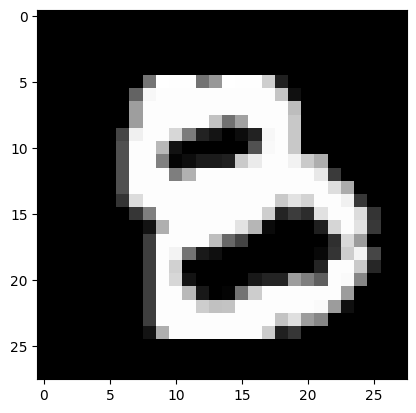

Prediction:  [0]
Label:  0


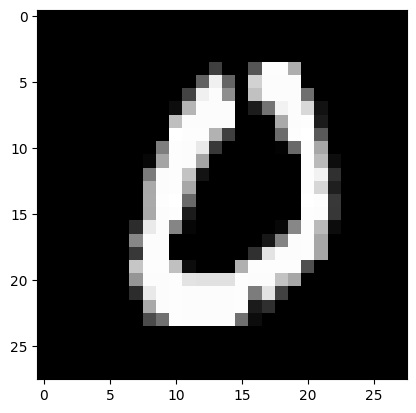

Prediction:  [4]
Label:  4


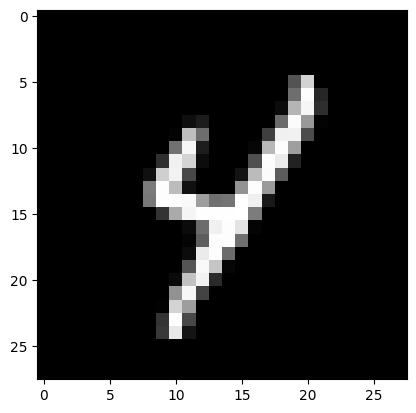

Prediction:  [3]
Label:  3


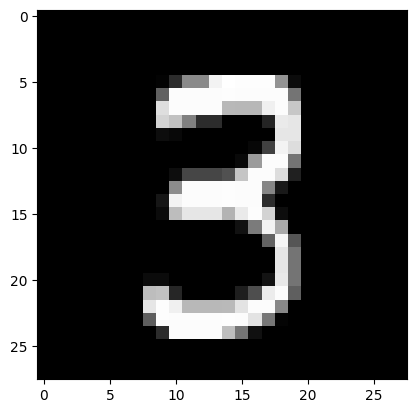

In [96]:
test_prediction(0, W1, b1, W2, b2)
test_prediction(1, W1, b1, W2, b2)
test_prediction(2, W1, b1, W2, b2)
test_prediction(3, W1, b1, W2, b2)